In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#modeling

import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#  Options 
pd.set_option("display.max_rows", 1091)

In [3]:
def generate_model(features,target):
    model = LinearRegression()
    model.fit(features, target)
    training_score = model.score(features,target)
    validation_score = cross_val_score(model,features, target, cv=5, scoring='r2').mean()
    return training_score , validation_score, model

In [4]:
def model_summary(features,target):
    features = sm.add_constant(features)
    model = sm.OLS(target,features)
    fit = model.fit()
    return fit.summary()

In [5]:
def remove_outlier(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3-q1 
    lower_bound  = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    handled_outliers = dataframe.loc[(dataframe[column] > lower_bound) & (dataframe[column] < upper_bound)]
    return handled_outliers

In [24]:

def diagnostic_plot(x, y_log):
    plt.figure(figsize=(20,5))
    rgr = LinearRegression()
    rgr.fit(x,y_log)
    pred = rgr.predict(x)
    plt.subplot(1, 3, 2)
    res = y_log - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a
    # specified theoretical distribution
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    plt.savefig('resid_log.png')

In [7]:
pickle_in = open("feature_engineered.pkl","rb")
dataset = pickle.load(pickle_in)

In [8]:
dataset = dataset.sample(frac=1, random_state = 4).reset_index(drop=True)

In [9]:
dataset= remove_outlier(dataset, 'price')

In [ ]:
sns.pairplot(dataset)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, ax=ax );
plt.xlim(-0.7, 17)
plt.ylim(17,-0.7)

(6, -0.7)

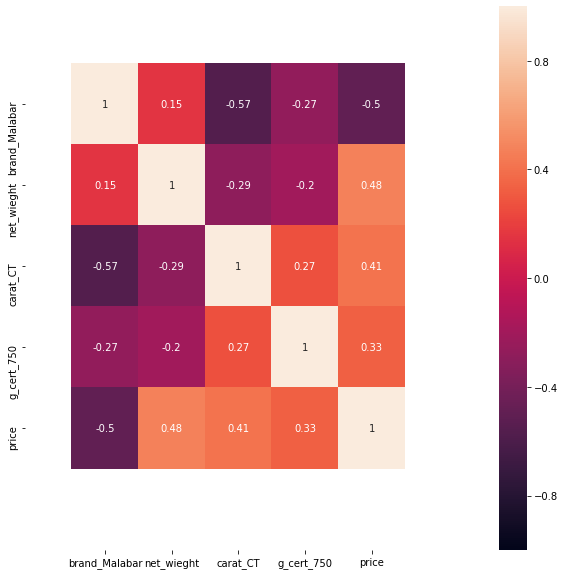

In [28]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(dataset.loc[:,['brand_Malabar', 'net_wieght', 'carat_CT', 'g_cert_750', 'price']].corr(), annot=True, vmin=-1, vmax=1, ax=ax );
plt.xlim(-0.7, 6)
plt.ylim(6,-0.7)

In [10]:
target = dataset.loc[:, dataset.columns == 'price']
features = dataset.loc[:, dataset.columns != 'price']

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size=0.2, random_state=42, )


In [12]:
#split target column from features column 
f_train = features_train.loc[:,['brand_Malabar','net_wieght', 'carat_CT', 'IGI_cert']]
f_test = features_test.loc[:,['brand_Malabar', 'net_wieght', 'carat_CT', 'IGI_cert']]




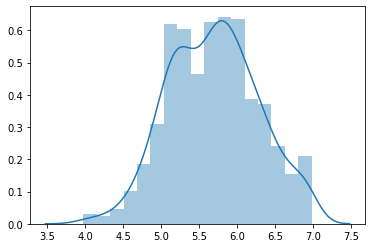

In [22]:
target_dist_log= sns.distplot(np.log(target_train))
figure = target_dist_log.get_figure()    
figure.savefig('target_dist_log.png', dpi=400)

In [14]:
traning_score, validation_score, model = generate_model(f_train, np.log(target_train))


In [15]:
traning_score

0.7121816097522374

In [16]:
validation_score

0.7088123206610282

In [17]:
predictions = model.predict(f_test)

In [18]:
model.score(f_test, np.log(target_test))

0.6860975628597752

In [29]:
model_summary(f_train, np.log(target_train))

/Users/hi/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 19 Sep 2019   Prob (F-statistic):          2.21e-194
Time:                        09:48:48   Log-Likelihood:                -192.31
No. Observations:                 730   AIC:                             394.6
Df Residuals:                     725   BIC:                             417.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2811      0.032    165.915      0.000       5.219       5.344
brand_Malabar    -0.5269      0.029    -18.125      0.000      -0.584      -0.470
net_wieght        0.1544      0.005     31.321      0.000       0.145       0.164
carat_CT          2.0646      0.170     12.153      0.000       1.731       2.398
IGI_cert          0.1114      0.037      3.052      0.002       0.040       0.183
==============================================================================
Omnibus:                       45.812   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.648
Skew:                           0.115   Prob(JB):                     2.39e-37
Kurtosis:                       5.344   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

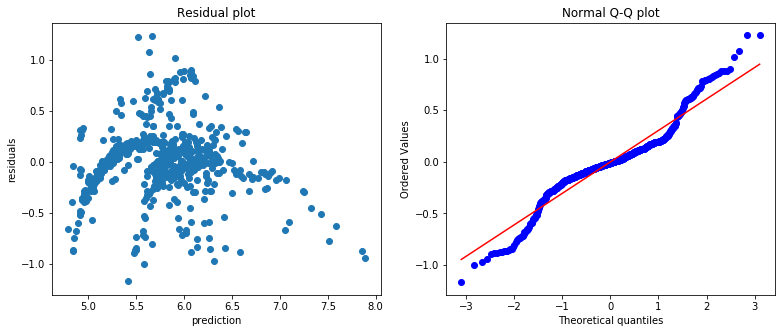

In [25]:
diagnostic_plot(f_train, np.log(target_train['price']) )